In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

In [2]:
file = open('names.txt', 'r')
names = [name.strip() for name in file.readlines()]
file.close()
names[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
letters = [['.']+list(name)+['.'] for name in names]
letters[:10]

[['.', 'e', 'm', 'm', 'a', '.'],
 ['.', 'o', 'l', 'i', 'v', 'i', 'a', '.'],
 ['.', 'a', 'v', 'a', '.'],
 ['.', 'i', 's', 'a', 'b', 'e', 'l', 'l', 'a', '.'],
 ['.', 's', 'o', 'p', 'h', 'i', 'a', '.'],
 ['.', 'c', 'h', 'a', 'r', 'l', 'o', 't', 't', 'e', '.'],
 ['.', 'm', 'i', 'a', '.'],
 ['.', 'a', 'm', 'e', 'l', 'i', 'a', '.'],
 ['.', 'h', 'a', 'r', 'p', 'e', 'r', '.'],
 ['.', 'e', 'v', 'e', 'l', 'y', 'n', '.']]

In [4]:
bigram = {}
for name in letters:
    for l1, l2 in zip(name, name[1:]):
        key = (l1,l2)
        bigram[key] = bigram.get(key, 0) + 1

In [5]:
unique_char = sorted(set([char for l in letters for char in l]))
length = len(unique_char)
length, unique_char

(27,
 ['.',
  'a',
  'b',
  'c',
  'd',
  'e',
  'f',
  'g',
  'h',
  'i',
  'j',
  'k',
  'l',
  'm',
  'n',
  'o',
  'p',
  'q',
  'r',
  's',
  't',
  'u',
  'v',
  'w',
  'x',
  'y',
  'z'])

In [7]:
chtoi = {unique_char[i]:i for i in range(len(unique_char))}
chtoi

{'.': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [60]:
bigram_plot = torch.zeros((length, length))
for i in range(length):
    for j in range(length):
        bigram_plot[i, j] = bigram.get((unique_char[i],unique_char[j]), 1)

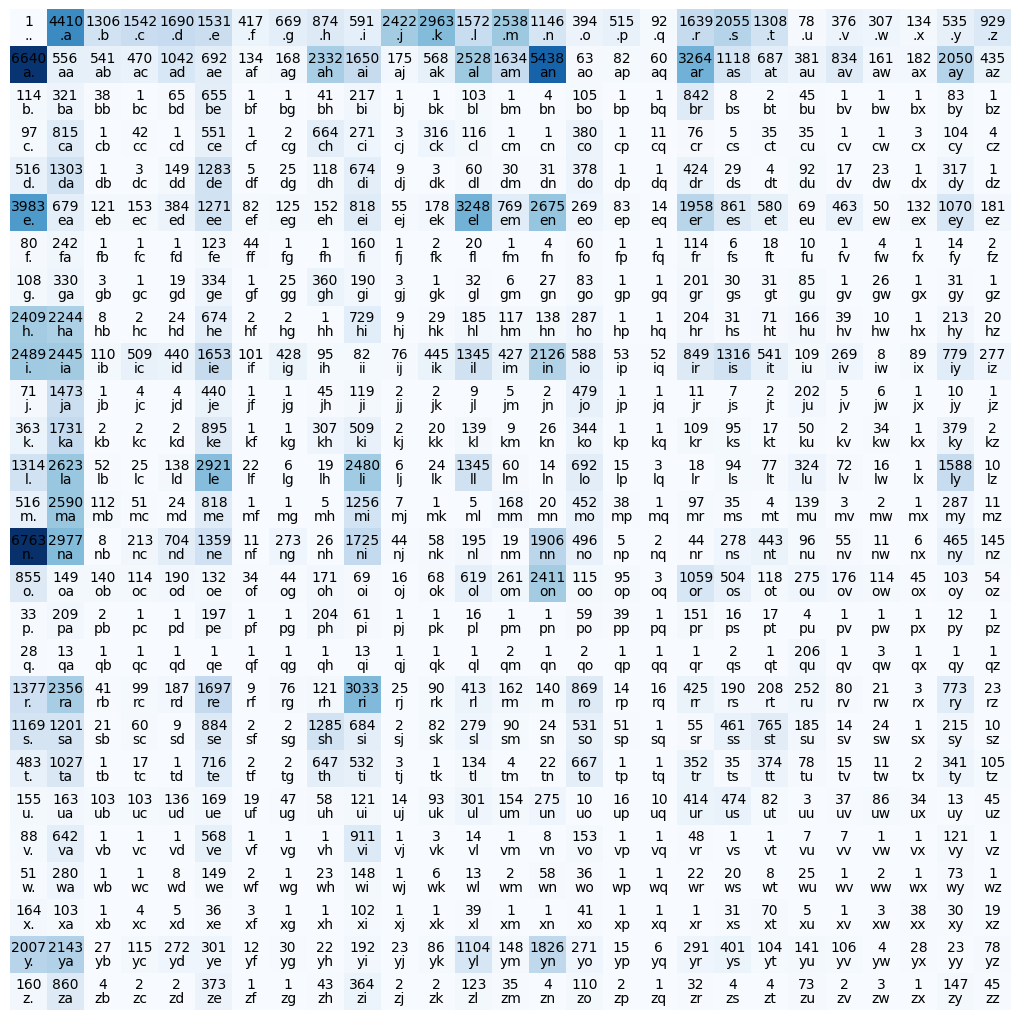

In [61]:
plt.figure(figsize=(13,13))
plt.imshow(bigram_plot, cmap='Blues')
for i in range(length):
    for j in range(length):
        plt.text(j, i, bigram.get((unique_char[i],unique_char[j]), 1), ha="center", va="bottom")
        plt.text(j, i, unique_char[i]+unique_char[j], ha="center", va="top")
plt.axis('off');

In [62]:
bigram_plot /= bigram_plot.sum(1, keepdims=True)

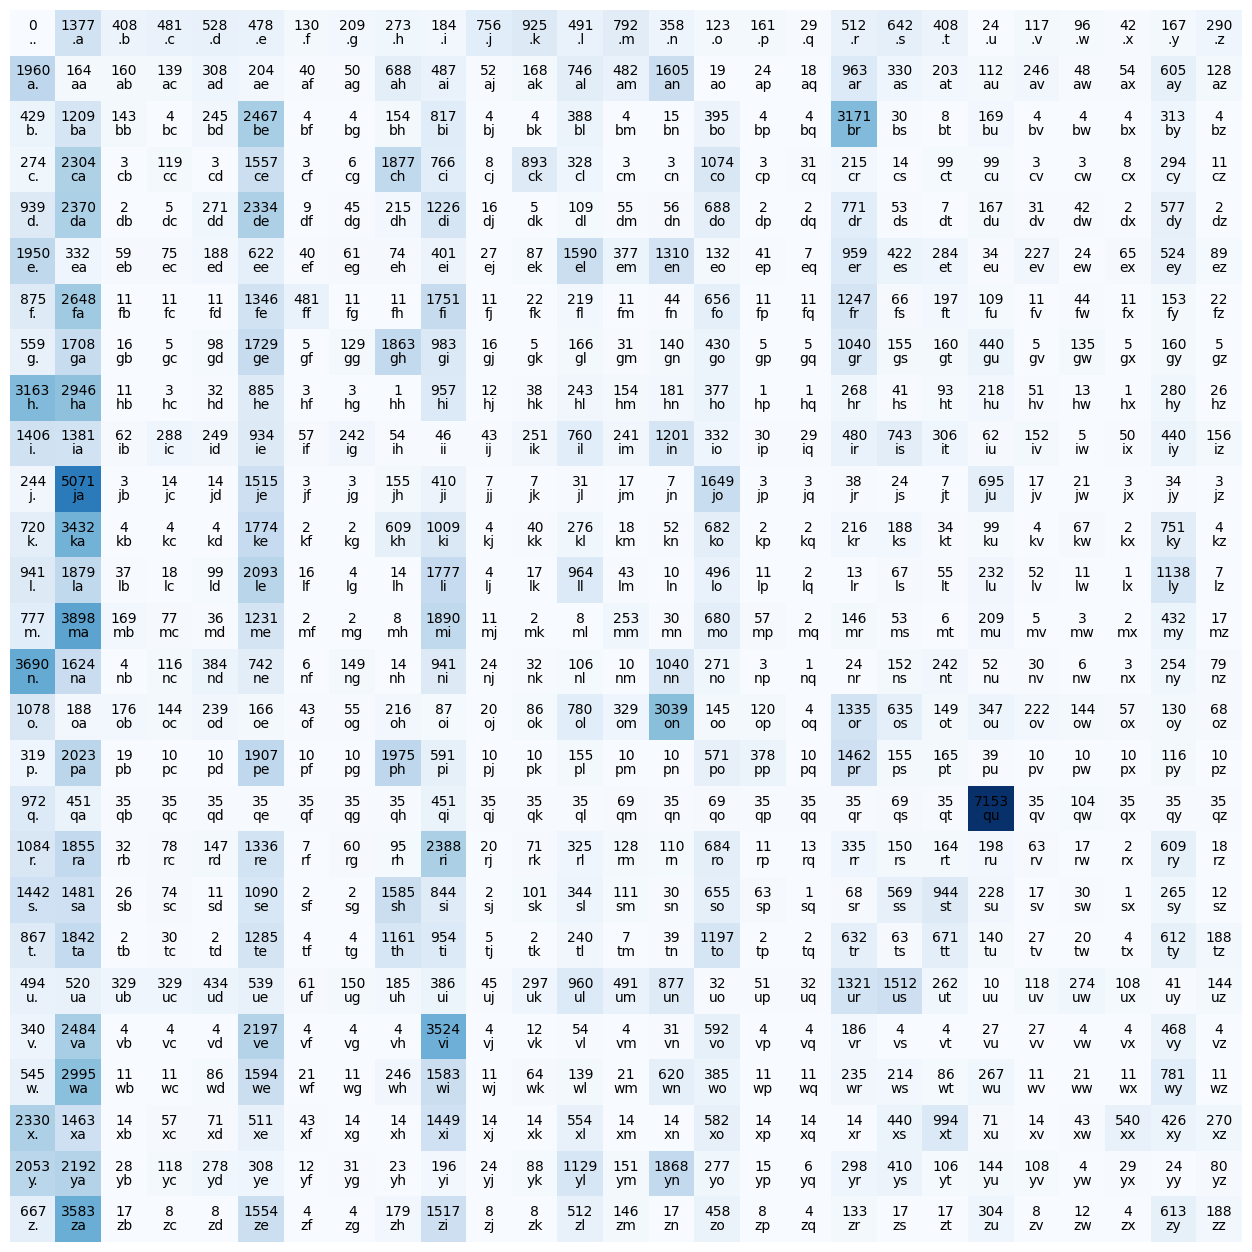

In [63]:
plt.figure(figsize=(16,16))
plt.imshow(bigram_plot, cmap='Blues')
for i in range(length):
    for j in range(length):
        plt.text(j, i, round(bigram_plot[i,j].item()*10000), ha="center", va="bottom")
        plt.text(j, i, unique_char[i]+unique_char[j], ha="center", va="top")
plt.axis('off');

In [64]:
def get_loss(word):
    loss = 0
    for c1, c2 in zip(word,word[1:]):
        loss -= torch.log(bigram_plot[chtoi[c1],chtoi[c2]]).item()
    return loss/len(word)

In [74]:
g = torch.Generator().manual_seed(2147483647)
new_names = []
for i in range(10):
    name = ''
    sample = ''
    draw_ = 0
    while sample != '.':
        draw = torch.multinomial(bigram_plot[draw_,:], 1, replacement=True, generator=g).item()
        sample = unique_char[draw]
        name += sample
        draw_ = draw
    loss = get_loss(name)
    new_names.append((name,loss))
new_names

[('mor.', 1.7308661937713623),
 ('axx.', 2.4007062017917633),
 ('minaymoryles.', 2.2267166009316077),
 ('kondlaisah.', 2.24396305734461),
 ('anchshizarie.', 2.3547225823769202),
 ('odaren.', 1.7934262667383467),
 ('iaddash.', 2.1142357885837555),
 ('h.', 0.5755854249000549),
 ('jhinatien.', 2.2099097430706025),
 ('egushl.', 2.5759628329958235)]

In [75]:
get_loss('alantg')

2.958698789278666